# ML Answers

- **Answer Set**: No. 02
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [245]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

Now we can load our dataset:

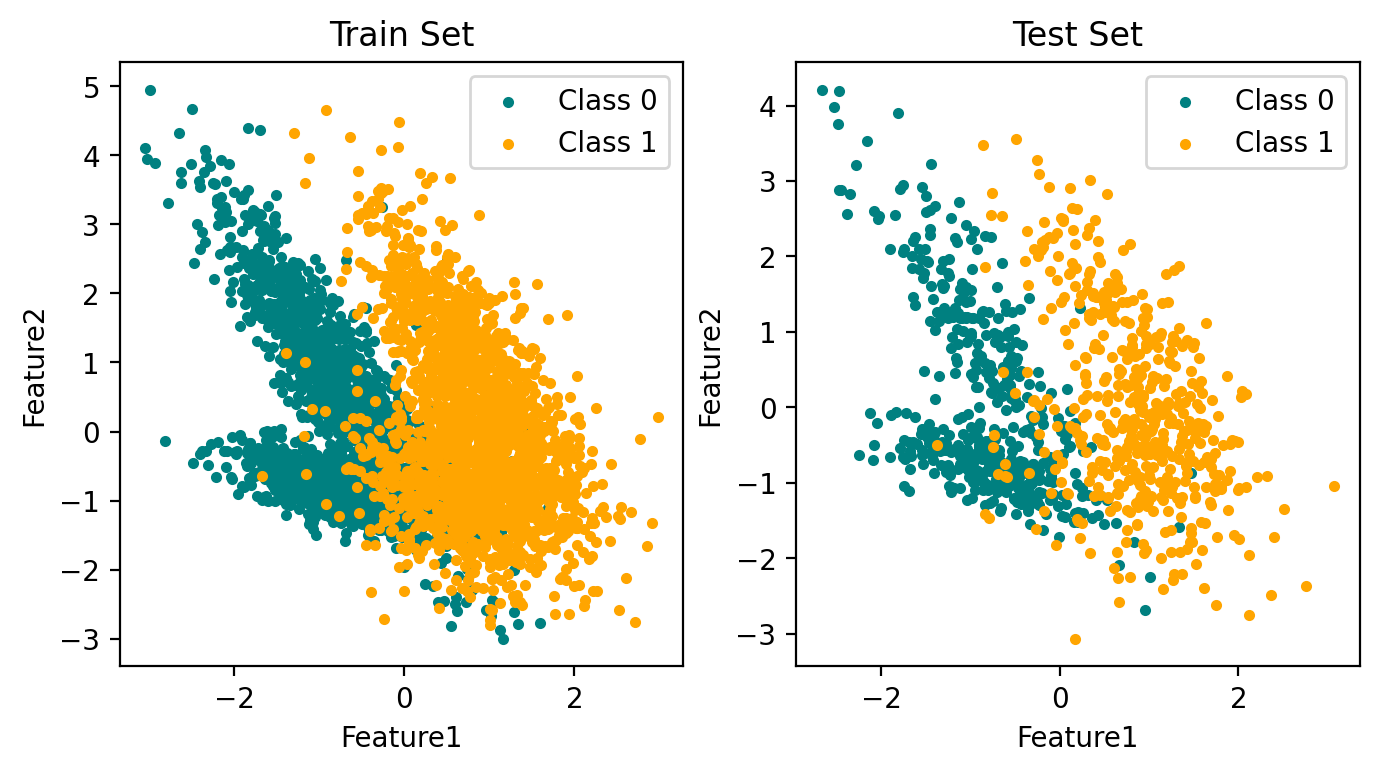

In [253]:
train_set = np.loadtxt("../lib/train.csv", delimiter=',', skiprows=1)
test_set = np.loadtxt("../lib/test.csv", delimiter=',', skiprows=1)

train_features = train_set[:, :-1]
train_labels = train_set[:, -1]
train_labels[train_labels == 0] = -1
train_class_0 = np.array([
    train_features[i] for i in range(len(train_labels)) if train_labels[i] == -1
]).T
train_class_1 = np.array([
    train_features[i] for i in range(len(train_labels)) if train_labels[i] == 1
]).T

test_features = test_set[:, :-1]
test_labels = test_set[:, -1]
test_labels[test_labels == 0] = -1
test_class_0 = np.array([
    test_features[i] for i in range(len(test_labels)) if test_labels[i] == -1
]).T
test_class_1 = np.array([
    test_features[i] for i in range(len(test_labels)) if test_labels[i] == 1
]).T

fig = plt.figure(figsize=(8, 4), dpi=200)

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(train_class_0[0], train_class_0[1], label="Class 0", marker=".", c="teal")
ax1.scatter(train_class_1[0], train_class_1[1], label="Class 1", marker=".", c="orange")
ax1.set_title("Train Set")
ax1.set_xlabel("Feature1")
ax1.set_ylabel("Feature2")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(test_class_0[0], test_class_0[1], label="Class 0", marker=".", c="teal")
ax2.scatter(test_class_1[0], test_class_1[1], label="Class 1", marker=".", c="orange")
ax2.set_title("Test Set")
ax2.set_xlabel("Feature1")
ax2.set_ylabel("Feature2")
ax2.legend()

plt.show()

### Features Function

A useful function, that generates a feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree:

In [247]:
def features_matrix(features, degree):
    features = features.T
    result = []

    for i in range(0, degree + 1):
        for coeffs in polynomial_coefficients(len(features), i, 0):
            terms = [np.power(features[index], coeff) for index, coeff in enumerate(coeffs)]
            result.append(np.prod(terms, axis=0))
    
    return np.array(result).T

def polynomial_coefficients(terms, degree, index):
    result = []

    if index == terms - 1:
        return [[degree]]

    for i in range(degree, -1, -1):
        for coeff in polynomial_coefficients(terms, degree - i, index + 1):
            result.append([i] + coeff)

    return result

---

## Problem

### Predict Function

First, we define the **Perceptron** predict function using **Step Function**:

In [248]:
def predict_function(weights, features):
    return np.heaviside(features @ weights, 1) * 2 - 1

### Accuracy Function

Next, we define the **Accuracy Function**:

In [249]:
def accuracy_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs < 0] = 0

    return np.sum(costs) / len(features)

### Gradient Function

Next, we define the **Gradient Function**:

$$
\begin{aligned}
    & \frac{\partial J(\Theta)}{\partial \Theta} = X Y
\end{aligned}
$$

In [250]:
def gradient_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs > 0] = 0
    costs[costs < 0] = 1

    return -(costs * features * labels)[0]

### Train Function

Now, we use the iterative stochastic gradient descent algorithm for computing the weights:

$$
\begin{aligned}
    & \Theta_{i} = \Theta_{i-1} - \alpha.\frac{\partial J(\Theta)}{\partial \Theta}
\end{aligned}
$$

In [251]:
def train_model(features, labels, learning_rate=0.001, epoch_count=1000, batch_size=1):
    data_set = np.append(features, np.array([labels]).T, 1)
    weights = np.ones(len(features[0]))
    history = np.zeros(epoch_count)

    for epoch in range(epoch_count):
        np.random.shuffle(data_set)

        batches = [
            data_set[batch * batch_size : (batch + 1) * batch_size]
            for batch in range(int(len(data_set) / batch_size))
        ]

        weights_temp = weights
        for batch in batches:
            gradient = gradient_function(weights_temp, batch[:, :-1], batch[:, -1])
            weights_temp = weights_temp - learning_rate * gradient

        accuracy_temp = accuracy_function(weights_temp, data_set[:, :-1], data_set[:, -1])
        accuracy = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])
        if (accuracy_temp > accuracy):
            weights = weights_temp

        history[epoch] = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])

    return (weights, history)

### Train Models

In this section, we will use our predefined functions for training our models and computing cost values:

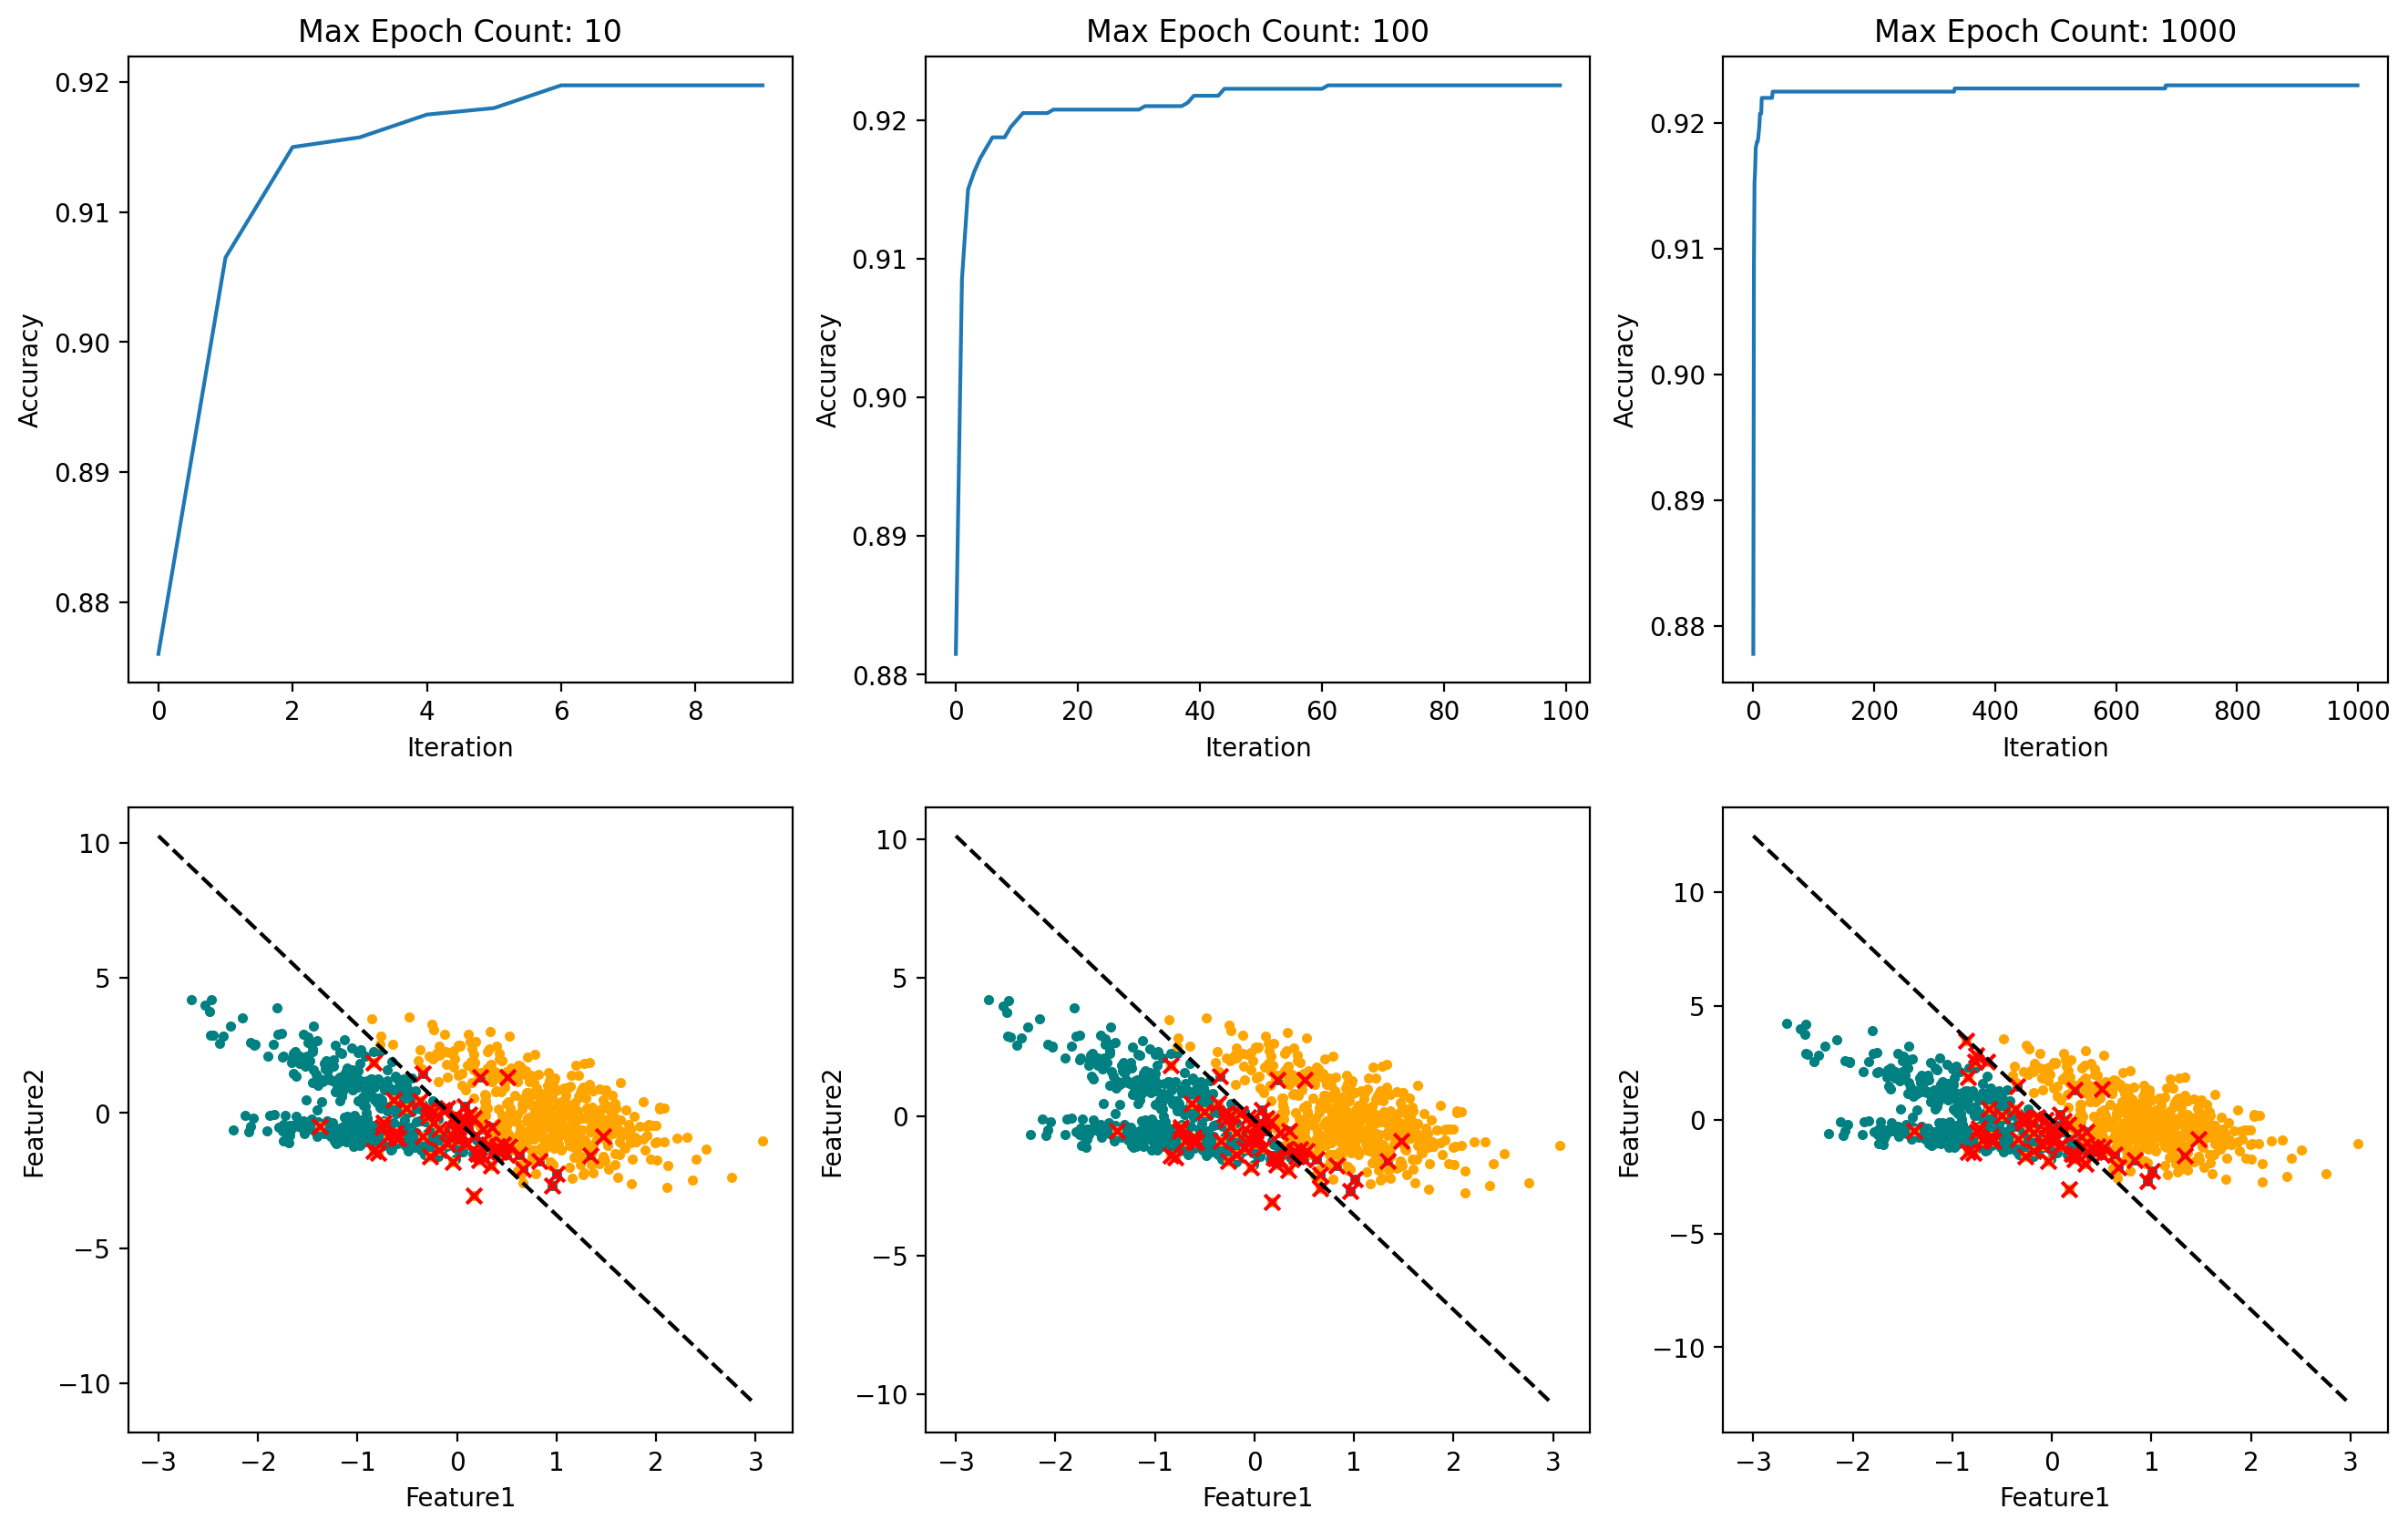

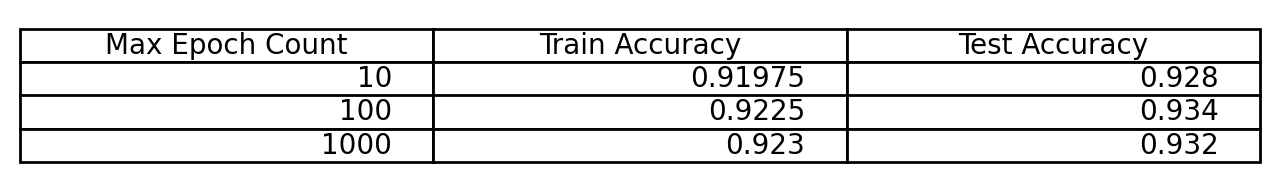

In [260]:
epoch_counts = [10, 100, 1000]
histories = []

fig = plt.figure(figsize=(16, 10), dpi=200)

index = 0
for epoch_count in epoch_counts:
    index += 1
    (weights, history) = train_model(
        features_matrix(train_features, 1),
        train_labels,
        epoch_count=epoch_count
    )

    # Plot accuracy history
    axis = fig.add_subplot(2, len(epoch_counts), index)
    axis.plot(range(0, len(history)), history)
    axis.set_title(f"Max Epoch Count: {epoch_count}")
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Accuracy")

    # Plot test set and trained line
    test_predicts = predict_function(weights, features_matrix(test_features, 1))
    test_class_incorrect = np.array([
        test_features[i] for i in range(len(test_features)) if test_predicts[i] != test_labels[i]
    ]).T

    axis = fig.add_subplot(2, len(epoch_counts), len(epoch_counts) + index)
    axis.scatter(test_class_0[0], test_class_0[1], label="Class 0", marker=".", c="teal")
    axis.scatter(test_class_1[0], test_class_1[1], label="Class 1", marker=".", c="orange")
    axis.scatter(test_class_incorrect[0], test_class_incorrect[1], label="Class Incorrect", marker="x", c="red")
    x = np.linspace(-3, 3, 1000)
    f = lambda x: (-weights[1] * x - weights[0]) / weights[2]
    axis.plot(x, f(x), color='black', ls='--')
    axis.set_xlabel("Feature1")
    axis.set_ylabel("Feature2")

    histories.append([
        epoch_count,
        accuracy_function(
            weights,
            features_matrix(train_features, 1),
            train_labels
        ),
        accuracy_function(
            weights,
            features_matrix(test_features, 1),
            test_labels
        )
    ])
plt.show()

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=histories, colLabels=["Max Epoch Count", "Train Accuracy", "Test Accuracy"], loc='center')
plt.axis("off")
plt.show()

### Results

As we can see, the model accuracy with 10 iterations too close to the trained model with 1000 iterations, and also, as we can see the dataset is not linearly separable, so the best accuracy of a perceptron model can not be greater than `0.94`

---